In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
import random 

In [2]:
def imshow(title = 'image', image = None , size = 5):
    w,h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(aspect_ratio*size,size))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

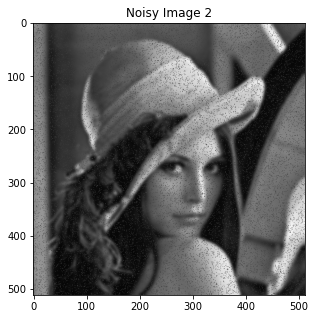

[[[139 139 139]
  [144 144 144]
  [138 138 138]
  ...
  [ 90  90  90]
  [ 91  91  91]
  [ 92  92  92]]

 [[142 142 142]
  [134 134 134]
  [142 142 142]
  ...
  [ 90  90  90]
  [ 90  90  90]
  [ 91  91  91]]

 [[141 141 141]
  [ 64  64  64]
  [139 139 139]
  ...
  [ 91  91  91]
  [ 91  91  91]
  [ 93  93  93]]

 ...

 [[114 114 114]
  [120 120 120]
  [117 117 117]
  ...
  [ 22  22  22]
  [ 59  59  59]
  [ 26  26  26]]

 [[113 113 113]
  [116 116 116]
  [116 116 116]
  ...
  [ 24  24  24]
  [ 28  28  28]
  [ 21  21  21]]

 [[115 115 115]
  [114 114 114]
  [118 118 118]
  ...
  [ 23  23  23]
  [ 23  23  23]
  [ 24  24  24]]]


In [37]:
noisy_image=cv2.imread("C:\\Users\\baksh\\Desktop\\noise2.jpg")
imshow('Noisy Image 2', noisy_image)
print(noisy_image)

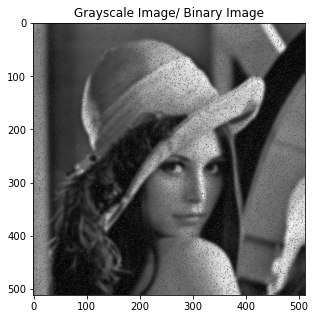

[[139 144 138 ...  90  91  92]
 [142 134 142 ...  90  90  91]
 [141  64 139 ...  91  91  93]
 ...
 [114 120 117 ...  22  59  26]
 [113 116 116 ...  24  28  21]
 [115 114 118 ...  23  23  24]]


In [4]:
# converting the image into gray scale
image_gray = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)
imshow('Grayscale Image/ Binary Image',image_gray)
print(image_gray)

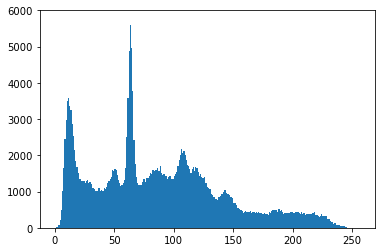

In [5]:
plt.hist(image_gray.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

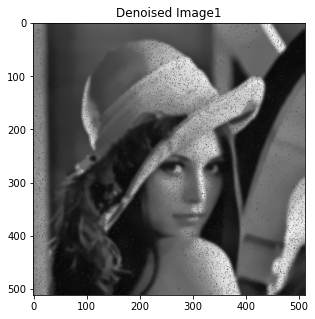

[[139 143 138 ...  88  88  88]
 [140 134 137 ...  88  88  88]
 [140  88 136 ...  88  88  88]
 ...
 [119 120 121 ...  27  32  28]
 [120 121 122 ...  27  27  27]
 [120 120 122 ...  27  26  27]]


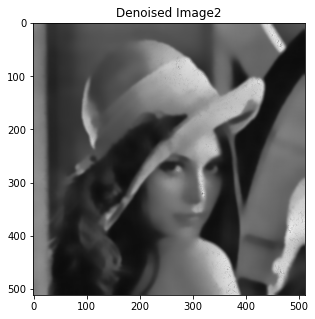

[[132 131 131 ...  86  86  86]
 [132 131 131 ...  86  86  86]
 [131 130 131 ...  86  86  86]
 ...
 [126 126 127 ...  28  28  28]
 [127 127 127 ...  28  28  28]
 [128 128 127 ...  28  28  28]]


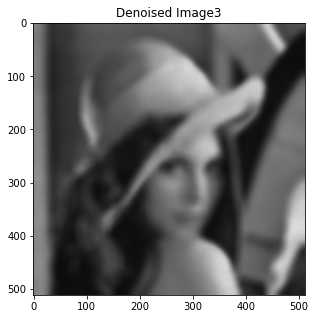

[[131 131 131 ...  85  85  85]
 [131 131 131 ...  85  85  85]
 [131 130 130 ...  84  84  84]
 ...
 [129 129 128 ...  28  28  28]
 [129 129 128 ...  28  28  28]
 [129 129 128 ...  28  28  28]]


In [16]:
image_denoised1=cv2.fastNlMeansDenoising(image_gray, None,h=10,templateWindowSize=4,searchWindowSize=21)
image_denoised2=cv2.fastNlMeansDenoising(image_gray, None,h=30,templateWindowSize=7,searchWindowSize=21)
image_denoised3=cv2.fastNlMeansDenoising(image_gray, None,h=100,templateWindowSize=20,searchWindowSize=21)
imshow('Denoised Image1', image_denoised1)
print(image_denoised1)
imshow('Denoised Image2', image_denoised2)
print(image_denoised2)
imshow('Denoised Image3', image_denoised3)
print(image_denoised3)

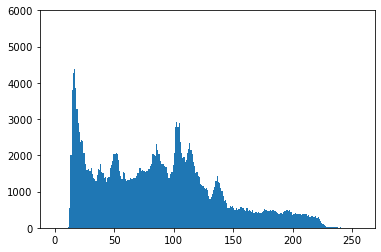

In [17]:
plt.hist(image_denoised2.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

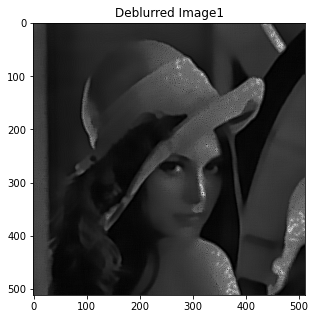

[[72 62 64 ... 43 43 43]
 [75 64 66 ... 43 43 43]
 [66 56 66 ... 44 43 43]
 ...
 [57 56 64 ... 10 12 13]
 [64 64 62 ... 12 14 14]
 [70 71 62 ... 12 14 14]]


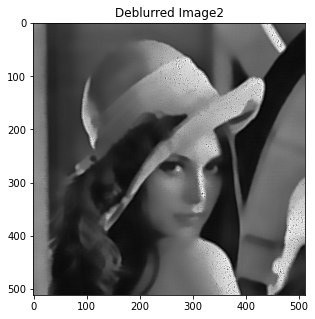

[[137 127 128 ...  85  85  85]
 [140 129 130 ...  85  85  85]
 [131 120 130 ...  86  85  85]
 ...
 [119 118 127 ...  24  26  27]
 [126 126 125 ...  26  28  28]
 [133 134 124 ...  26  28  28]]


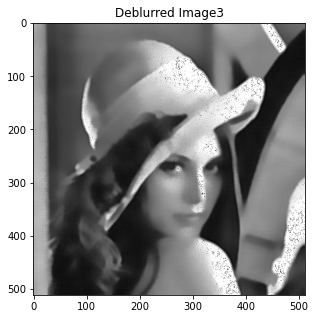

[[178 167 168 ... 112 112 112]
 [181 169 170 ... 112 112 112]
 [171 160 170 ... 113 112 112]
 ...
 [158 157 166 ...  32  34  35]
 [165 165 164 ...  34  36  36]
 [172 173 163 ...  34  36  36]]


In [18]:
kernel1 = np.array([[-1,-1,-1],[-1,8.5,-1],[-1,-1,-1]], np.float32)
kernel2 = np.array([[-1,-1,-1],[-1,8.99,-1],[-1,-1,-1]], np.float32)
kernel3 = np.array([[-1,-1,-1],[-1,9.3,-1],[-1,-1,-1]], np.float32)
image_filtered1 = cv2.filter2D(image_denoised2,-1, kernel1)
image_filtered2 = cv2.filter2D(image_denoised2,-1, kernel2)
image_filtered3 = cv2.filter2D(image_denoised2,-1, kernel3)
imshow('Deblurred Image1', image_filtered1)
print(image_filtered1)
imshow('Deblurred Image2', image_filtered2)
print(image_filtered2)
imshow('Deblurred Image3', image_filtered3)
print(image_filtered3)

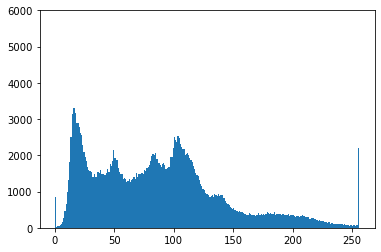

In [19]:
plt.hist(image_filtered2.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

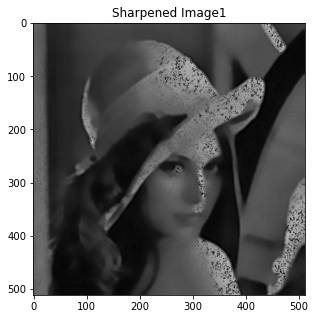

[[102 102 102 ...  68  68  68]
 [ 96 103 104 ...  68  68  68]
 [101  96 102 ...  69  68  68]
 ...
 [ 95  94  98 ...  19  21  22]
 [101 101 100 ...  21  20  22]
 [100  97  99 ...  21  22  22]]


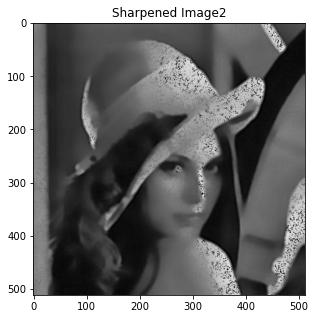

[[129 127 128 ...  85  85  85]
 [124 129 130 ...  85  85  85]
 [127 120 128 ...  86  85  85]
 ...
 [119 118 123 ...  24  26  27]
 [126 126 125 ...  26  26  28]
 [127 124 124 ...  26  28  28]]


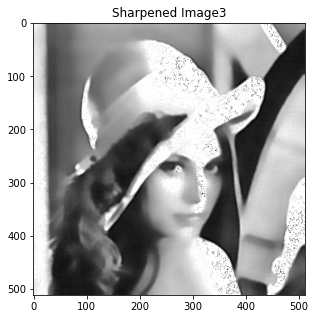

[[252 241 243 ... 162 162 162]
 [250 245 247 ... 162 162 162]
 [245 228 245 ... 163 162 162]
 ...
 [226 224 237 ...  46  49  51]
 [239 239 238 ...  49  51  53]
 [247 245 236 ...  49  53  53]]


In [20]:
blur= cv2.GaussianBlur(image_filtered2,(3,3),0)
image_sharp = cv2.subtract(image_filtered2, blur)
image_sharp1  = cv2.addWeighted(image_filtered2,0.8, image_sharp,-2,0)
image_sharp2  = cv2.addWeighted(image_filtered2,1, image_sharp,-2,0)
image_sharp3  = cv2.addWeighted(image_filtered2,1.9, image_sharp,-2,0)
#image_sharp = cv2.cvtColor(image_sharp, cv2.COLOR_GRAY2BGR)

imshow("Sharpened Image1", image_sharp1)
print(image_sharp1)
imshow("Sharpened Image2", image_sharp2)
print(image_sharp2)
imshow("Sharpened Image3", image_sharp3)
print(image_sharp3)

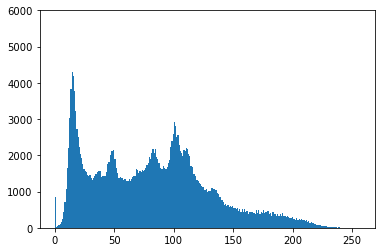

In [21]:
plt.hist(image_sharp2.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

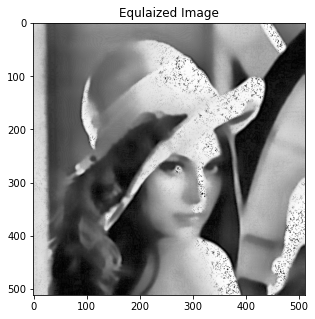

[[214 212 213 ... 138 138 138]
 [209 214 215 ... 138 138 138]
 [212 205 213 ... 140 138 138]
 ...
 [203 202 208 ...  43  46  47]
 [211 211 210 ...  46  46  49]
 [212 209 209 ...  46  49  49]]


In [22]:
equ = cv2.equalizeHist(image_sharp2)
imshow('Equlaized Image',equ)
print(equ)

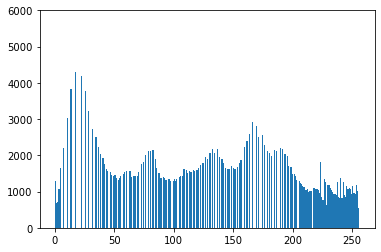

In [23]:
plt.hist(equ.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

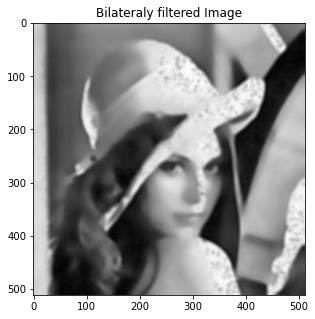

[[212 213 213 ... 136 136 136]
 [212 212 213 ... 136 136 136]
 [213 212 212 ... 135 135 135]
 ...
 [207 208 208 ...  46  46  46]
 [208 208 208 ...  46  46  46]
 [208 208 208 ...  46  45  45]]


In [24]:
image_bfiltered = cv2.bilateralFilter(equ, d=9, sigmaColor = 1000, sigmaSpace = 200)
imshow('Bilateraly filtered Image', image_bfiltered)
print(image_bfiltered)

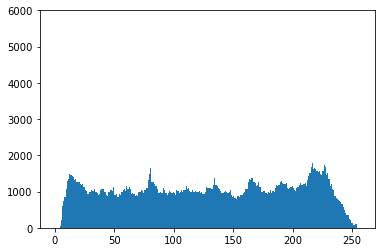

In [25]:
plt.hist(image_bfiltered.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

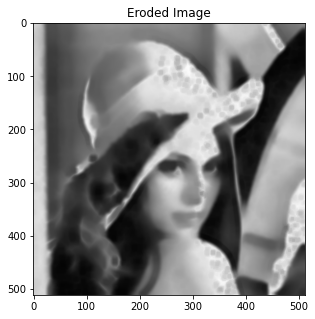

[[212 212 212 ... 133 134 135]
 [212 212 212 ... 132 133 134]
 [212 212 212 ... 132 132 133]
 ...
 [207 207 207 ...  45  45  45]
 [207 207 207 ...  45  45  45]
 [207 207 207 ...  45  45  45]]


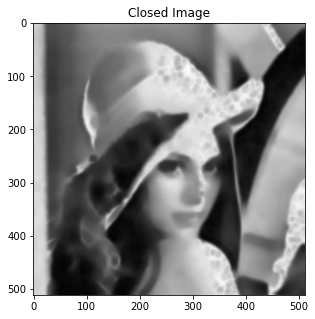

In [26]:
kernel =  np.ones((5,5), np.uint8)

image_erode = cv2.erode(image_bfiltered, kernel, iterations = 1)
imshow('Eroded Image', image_erode)
print(image_erode)

image_closed = cv2.morphologyEx(image_erode, cv2.MORPH_CLOSE, kernel)
imshow('Closed Image',image_closed)

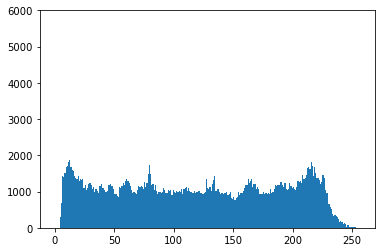

In [27]:
plt.hist(image_closed.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

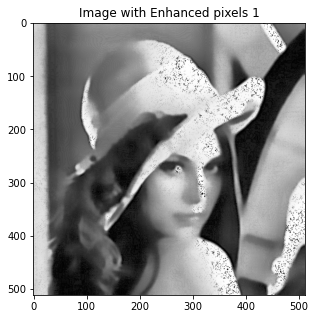

[[215 213 214 ... 139 139 139]
 [210 215 216 ... 139 139 139]
 [213 206 214 ... 141 139 139]
 ...
 [204 203 209 ...  44  47  48]
 [212 212 211 ...  47  47  50]
 [213 210 210 ...  47  50  50]]


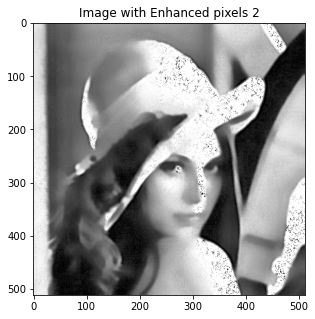

[[236 234 235 ... 153 153 153]
 [231 236 238 ... 153 153 153]
 [234 226 235 ... 155 153 153]
 ...
 [224 223 230 ...  48  52  53]
 [233 233 232 ...  52  52  55]
 [234 231 231 ...  52  55  55]]


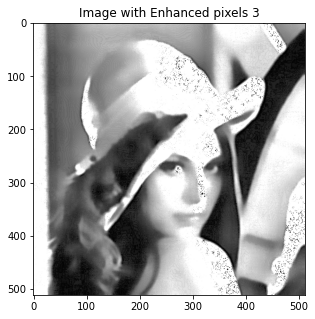

[[255 255 255 ... 181 181 181]
 [255 255 255 ... 181 181 181]
 [255 255 255 ... 184 181 181]
 ...
 [255 255 255 ...  58  62  63]
 [255 255 255 ...  62  62  66]
 [255 255 255 ...  62  66  66]]


In [33]:
alpha1,alpha2,alpha3 = 1.0,1.1,1.3
beta1,beta2,beta3 = 1,1,2
image_enhanced1 = cv2.convertScaleAbs(equ, alpha = alpha1 , beta = beta1 )
image_enhanced2 = cv2.convertScaleAbs(equ, alpha = alpha2 , beta = beta2 )
image_enhanced3 = cv2.convertScaleAbs(equ , alpha = alpha3 , beta = beta3 )
imshow('Image with Enhanced pixels 1', image_enhanced1)
print(image_enhanced1)
imshow('Image with Enhanced pixels 2', image_enhanced2)
print(image_enhanced2)
imshow('Image with Enhanced pixels 3', image_enhanced3)
print(image_enhanced3)

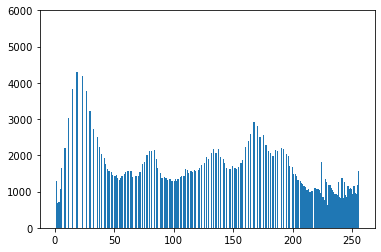

In [34]:
plt.hist(image_enhanced1.ravel(),256,[0,256])
plt.ylim([0,6000])
plt.show()

C:\Users\baksh\AppData\Local\Temp\ipykernel_22416\1632262322.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if face == ():
C:\Users\baksh\AppData\Local\Temp\ipykernel_22416\1632262322.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if eyes == ():


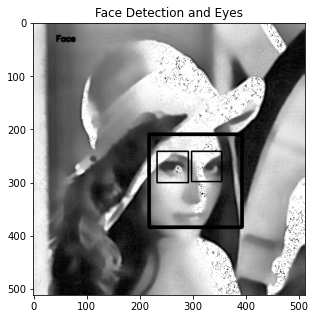

In [36]:
face_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_eye.xml")

#image = cv2.imread("C:\\Users\\baksh\\Pictures\\IMG_20211204_131154.jpg")
#gray = cv2.cvtColor(image_enhanced,cv2.COLOR_BGR2GRAY)

face = face_classifier.detectMultiScale(image_enhanced2,1.3,minNeighbors=5,minSize =(5,5)) 

if face == ():
    print("No faces found")

for (x,y,w,h) in face:
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image_enhanced2, 'Face', (x-w, y-h),font,0.5, (0,0, 255),2,cv2.LINE_AA)
    cv2.rectangle(image_enhanced2, (x,y), (x+w,y+h),(0,0,255),5)
    roi_gray= image_enhanced2[y:y+h,x:x+w]
    roi_color=image_enhanced2[y:y+h,x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray,1.1,minNeighbors =1, minSize = (1,1))
    for (ex,ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
        if eyes == ():
            print("Eyes Not detected")
    
imshow('Face Detection and Eyes',image_enhanced2)

In [32]:
face_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_eye.xml")

#image = cv2.imread("C:\\Users\\baksh\\Pictures\\IMG_20211204_131154.jpg")
#gray = cv2.cvtColor(noisy_image,cv2.COLOR_BGR2GRAY)

face = face_classifier.detectMultiScale(image_gray,1.3,minNeighbors=5,minSize=(500,500)) 


for (x,y,w,h) in face:
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image_gray, 'Face', (x-w, y-h),font,0.5, (127,0, 255),2,cv2.LINE_AA)
    cv2.rectangle(image_gray, (x,y), (x+w,y+h),(127,0,255),5)
    roi_gray= image_gray[y:y+h,x:x+w]
    roi_color=image_gray[y:y+h,x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray,1.2,3)
    for (ex,ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        
if face == ():
    print("No faces found !!!!!")   
else:
    imshow('Face Detection and Eyes',image_gray)

No faces found !!!!!
